# Bonn Fernandez - 42101212
----------------------------------------------------------------------------------
# **Milestone 2**

# **Task 1 - Partial Pipeline** 

In [9]:
import pandas as pd
import numpy as np
## Import Data and Wrangle Columns
df1 = pd.read_csv("../../data/raw/listings.csv")
ls_col = df1.columns
ls_want = ['name',
           'room_type',
           'price',
           'accommodates',
           'minimum_nights',
           'number_of_reviews',
           'review_scores_rating',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_communication',
           'review_scores_location'
          ]
ls_not_want = list(df1.drop(columns = ls_want).columns) ## invert drop function to keep the columns we need/want
df1 = df1.drop(columns = ls_not_want).dropna(axis='rows',how='any').reset_index(drop=True) #data frame with wanted columns and dealt missing data

## Processing Data
df2 = df1.copy()
labels_acc = ['1','2','3','4','5','6-10','10+']
bins_acc = [1,2,3,4,5,6,10,13]
df2['accommodates'] = pd.cut(x=df1['accommodates'],bins=bins_acc,labels=labels_acc,include_lowest=True)

## Convert str into float value
labels_price = ['<$100','$100-$199','$200-$299','$300-$399','$400-$500','$500+']
bins_price =[1,100,200,300,400,500,1000]
df2['price'] = pd.to_numeric(df1['price'].str.split('$').str.get(1),errors='coerce') # <---maybe list comprhension this?

## truncate the review_scores_rating to /10 int instead of /100
df2['review_scores_rating'] = (df1['review_scores_rating']*0.1)

## Sum up the ratings in a new column
df2['Overall Rating'] = df2['review_scores_rating'] + df2['review_scores_cleanliness'] + df2['review_scores_checkin']+df2['review_scores_communication']+df2['review_scores_location']

## Bayesian Rating for weighted scores
N_max = df2['number_of_reviews'].max()
NR = N_max*df2['Overall Rating'].mean()
df2['Bayesian Rating'] = (NR + (df2['number_of_reviews']*df2['Overall Rating']))/(N_max+df2['number_of_reviews'])

## Wrangling Dataframe
df3 = df2.copy()
df = (df3
       .reindex(columns=[              
                     'name',
                     'room_type',
                     'minimum_nights',
                     'price',
                     'accommodates',
                     'number_of_reviews',
                     'review_scores_rating',
                     'review_scores_cleanliness',
                     'review_scores_checkin',
                     'review_scores_communication',
                     'review_scores_location',
                     'Overall Rating',
                     'Bayesian Rating'
                       ]
                  )
       .rename(columns={
                     'name':'Name',
                     'room_type':'Room Type',
                     'price':'Price per Night ($)',
                     'minimum_nights':'Length of Stay',
                     'accommodates':'# of tenants',
                     'number_of_reviews':'Total Reviews',
                     'review_scores_rating':'Experience Rating',
                     'review_scores_cleanliness':'Cleanliness Rating',
                     'review_scores_checkin':'Checkin Rating',
                     'review_scores_communication':'Communication Rating',
                     'review_scores_location':'Location Rating',
                     'Overall Rating':'Overall Rating'
                       }           
             )
      )

# **Task 2  - Method Chaining**

In [1]:
import seaborn as sns
import sys 
sys.path.append('..')
from scripts import project_functions as pf # Method Chain located in scripts directory
raw_data = "../../data/raw/listings.csv"
df = pf.load_and_process(raw_data) 
display(df)


Name        Room Type  \
0                        D1 -  Million Dollar View 2 BR  Entire home/apt   
1     Monthly (or Longer ) Designer One Bedroom Down...  Entire home/apt   
2                          Vancouver's best kept secret  Entire home/apt   
3                                     EcoLoft Vancouver  Entire home/apt   
4           Close to PNE/Hastings Park and East Village  Entire home/apt   
...                                                 ...              ...   
3456   convenient and safe location near Killarney area  Entire home/apt   
3457    ❤️DT+Parking🌈AmazingView⭐️+Transit+Stadium=ForU  Entire home/apt   
3458        Stunning Gastown Loft in Vancouver Downtown  Entire home/apt   
3459  Central 1 BR suite in the heart of Cambie Village  Entire home/apt   
3460  Large Townhouse Bedroom close to Airport&Skytrain     Private room   

      Days of Stay  Price per Night ($) # of tenants  Total Reviews  \
0               90                150.0            4             16   
1               30                 85.0            1            430   
2               30                145.0            1             88   
3                3                140.0            3             33   
4                3                195.0            3              5   
...            ...                  ...          ...            ...   
3456             7                 58.0            1              2   
3457             1                140.0            2              1   
3458             2                117.0            1              2   
3459             2                 85.0            2              1   
3460             1                 75.0            1              2   

      Experience Rating  Cleanliness Rating  Checkin Rating  \
0                   9.3                 9.0            10.0   
1                   9.3                10.0             9.0   
2                   9.8                10.0            10.0   
3                   9.5                 9.0            10.0   
4                   9.6                10.0            10.0   
...                 ...                 ...             ...   
3456                8.0                10.0             8.0   
3457               10.0                10.0            10.0   
3458               10.0                10.0            10.0   
3459               10.0                10.0            10.0   
3460                9.0                10.0            10.0   

      Communication Rating  Location Rating  Overall Rating  Bayesian Rating  
0                      9.0             10.0            47.3        48.383069  
1                     10.0             10.0            48.3        48.366228  
2                     10.0             10.0            49.8        48.572428  
3                      9.0             10.0            47.5        48.366073  
4                     10.0             10.0            49.6        48.418172  
...                    ...              ...             ...              ...  
3456                   8.0             10.0            44.0        48.395965  
3457                  10.0             10.0            50.0        48.411645  
3458                  10.0             10.0            50.0        48.414037  
3459                  10.0             10.0            50.0        48.411645  
3460                  10.0             10.0            49.0        48.411025  

[3461 rows x 13 columns]

# **Task 3 - Exploratory Data Analysis**

---
### *About the Dataset*
The dataset is a compilation of all Vancouver's Airbnb information. It includes: Ratings, Location, Hosts, Accomodation, Price, Links, and muchmore. 

Although not associated with the Airbnb Co., the organization that compiled this dataset provides up-to-date data and license for public uses.

### *Why I chose this Dataset*

Initially, I was simply interested in ranking the most affordable yet best airbnb to stay in Vancouver. As someone who likes to travel, aggregating a large pool of airbnbs can be practical in sifting to good ones from the bad. However, as I glanced over the raw dataset I became intrgued as to what other information I can uncover from the pool of random data.

### *Chosen Weighted Score*
I used the bayesian rating method to fairly aggregate ratings based on the number of reviews an airbnb has. 

### *Overview report of the dataset*

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### *Research Questions*
Now processed data has been summarized by the Report above, the research questions i'll analyze the data with are:
 - Q1) What is the best Airbnb in Vancouver?
 - Q2) On what category of "Days of stay","Room Type","# of tenants" do the price per night concentrate to
 - Q3) How effective is Bayesian Rating method
 - Q4) Relationship of Total Reviews and Price and what does that say to the budget of people when it comes to choosing an airbnb
 - Q5) What are the top 5 Vancouver Airbnb at different price ranges?
---

## **Task 4 - Data Wrangling and Analysis**

### *Step 1) Wrangle the data for each of the research questions*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display(df)
## Dataframe for Question 1
top1=20
df_q1 = df.filter(['Name','Bayesian Rating','Price per Night ($)']).sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).head(top1) #top 10

## Datframe for Question 2 & 5
df_q2 = df.filter(['Name','Price per Night ($)','Bayesian Rating'])
top=10
df_q21 = df_q2[df_q2['Price per Night ($)'] < 100].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # <$100
df_q22 = df_q2[(df_q2['Price per Night ($)'] >= 100)&(df_q2['Price per Night ($)'] <= 200)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(100-200)
df_q23 = df_q2[(df_q2['Price per Night ($)'] > 200)&(df_q2['Price per Night ($)'] <= 300)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(200 - 300)
df_q24 = df_q2[(df_q2['Price per Night ($)'] > 300)&(df_q2['Price per Night ($)'] <= 400)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # $(300 - 400)
df_q25 = df_q2[(df_q2['Price per Night ($)'] > 400)].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).head(top) # $400+

## Dataframe for Question 3 and 4
df_q3 = df.filter(['Name','Days of Stay','Price per Night ($)','Bayesian Rating','# of tenants','Room Type'])
labels_nights = ['day(s)','week(s)','month(s)']
bins_nights = [1,7,29,2000]
df_q3['Length of Stay'] = pd.cut(x=df_q3['Days of Stay'],bins=bins_nights,labels=labels_nights,include_lowest=True)


### *Step 2) Visualizing the Wrangled datas*

#### Research Question 1 [Figure 1]

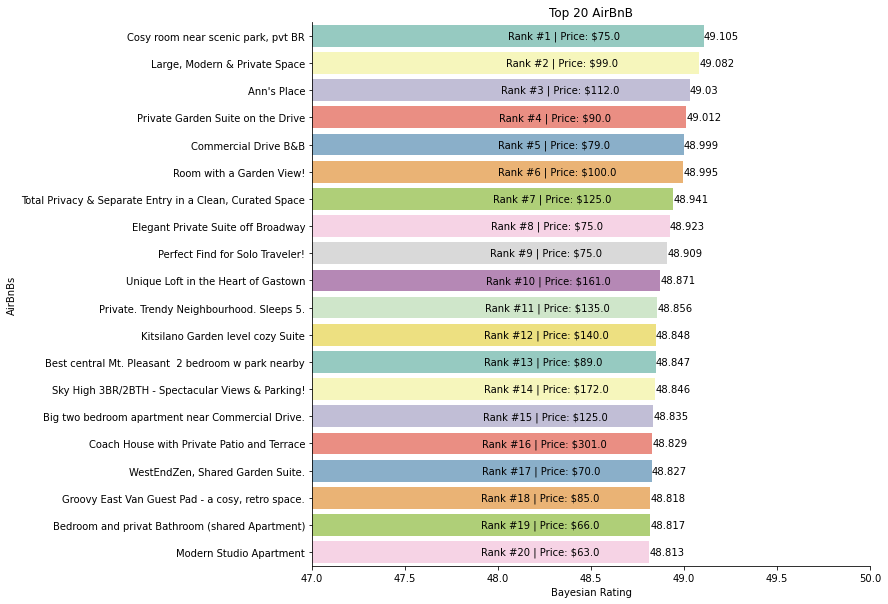

In [3]:
plt.figure(figsize=(10,top1*0.5))
plt.xlim(47,50)
plot = sns.barplot(data=df_q1,y='Name',x='Bayesian Rating',palette='Set3')
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plt.bar_label(plot.containers[0],labels=df_q1['Bayesian Rating'].round(3))
i=0
bars = range(1,top1+1)
for p in plot.patches:
    plot.annotate("Rank #"+str(bars[i])+" | Price: $"+str(df_q1['Price per Night ($)'][i].round(3)),
               (p.get_width()/2+23.5,p.get_y()+0.5)
               )
    i = i+1
plot.set(title=f"Top {top1} AirBnB", ylabel="AirBnBs")
plt.show()

#### Researche Question 2 [Figure 2]

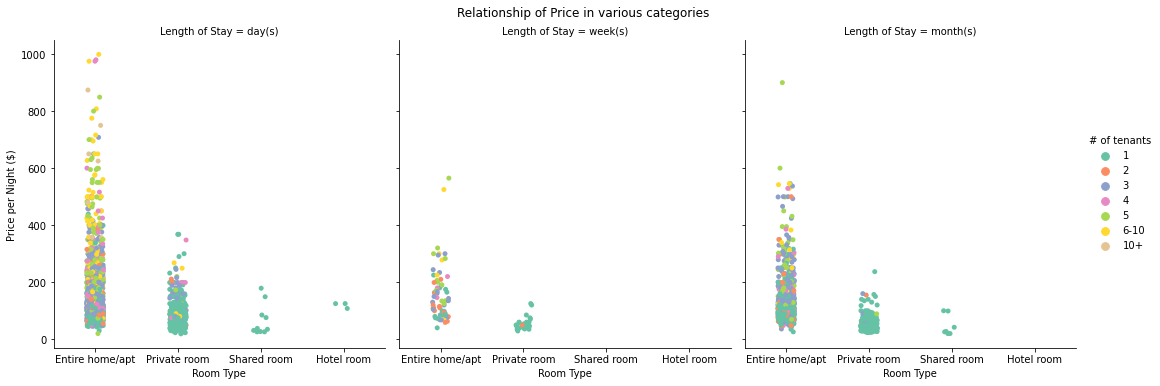

In [4]:
q2_plot = sns.catplot(data=df_q3,y='Price per Night ($)',x='Room Type',hue='# of tenants',col='Length of Stay',sharey=True,palette='Set2')
q2_plot = q2_plot.fig.suptitle("Relationship of Price in various categories",y=1.025)

#### Research Question 3 & 4 [Figure 3]

Text(0.5, 0.98, 'Catgorical Correlations')

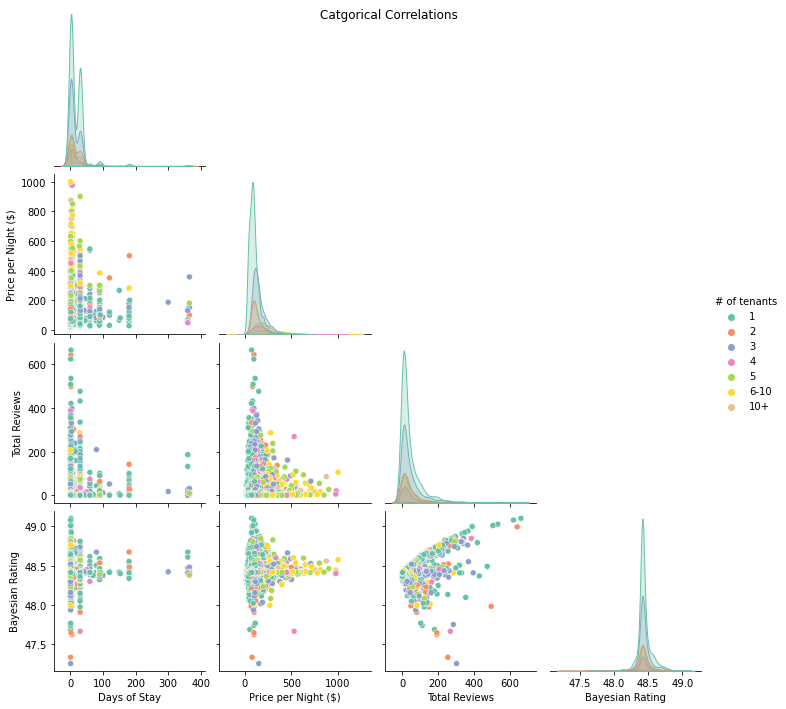

In [5]:
df_new=df.filter(['Days of Stay','Price per Night ($)','# of tenants','Total Reviews','Bayesian Rating','Room Type'])
q34_plot = sns.pairplot(df_new,corner=True,hue='# of tenants',diag_kind='kde',palette='Set2',)
q34_plot.fig.suptitle("Catgorical Correlations")

#### Research Question 5 [Figure 4]

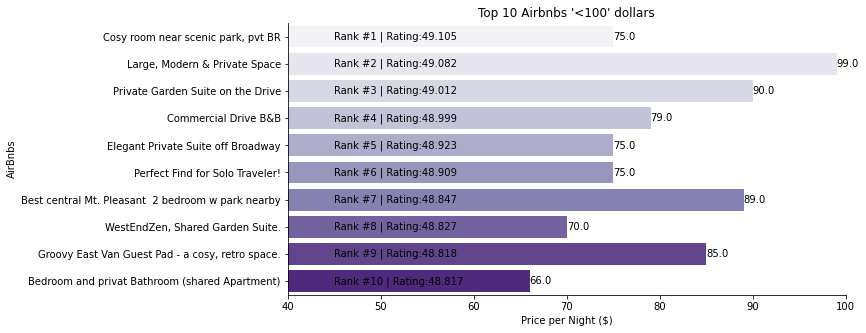

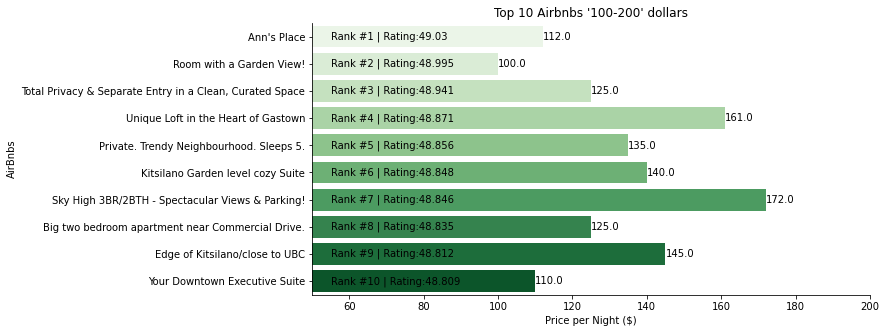

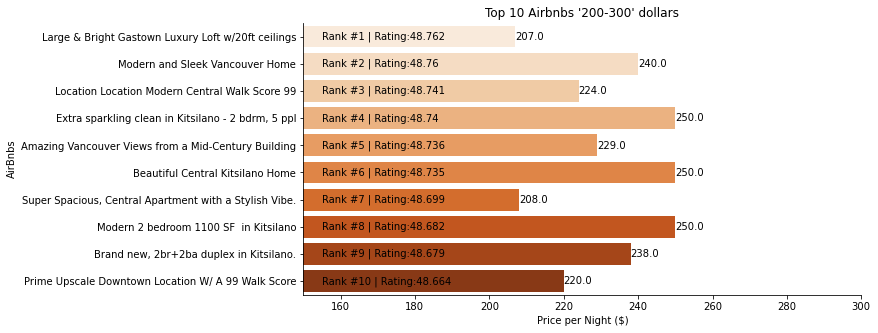

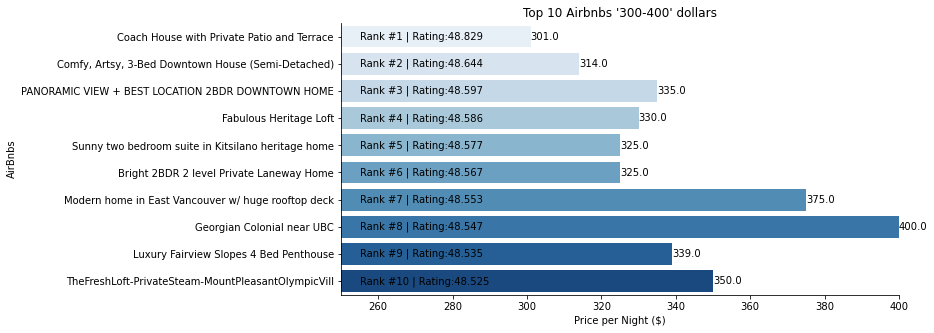

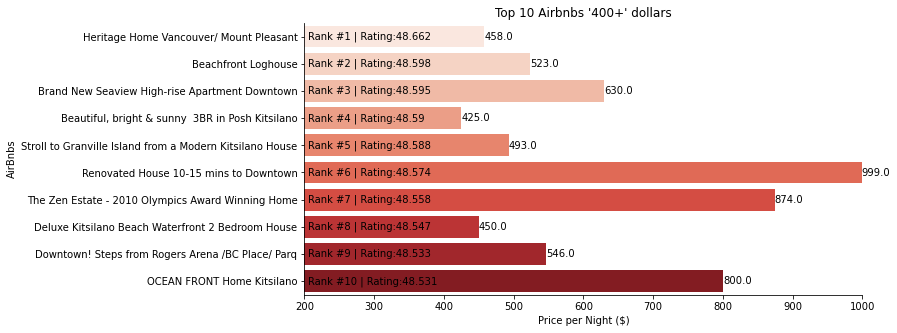

In [4]:
pf.Ranker(df=df_q21,title="<100",top=top,color='Purples',xsize=(40,100))
pf.Ranker(df=df_q22,title="100-200",top=top,color='Greens',xsize=(50,200))
pf.Ranker(df=df_q23,title="200-300",top=top,color='Oranges',xsize=(150,300))
pf.Ranker(df=df_q24,title="300-400",top=top,color='Blues',xsize=(250,400))
pf.Ranker(df=df_q25,title="400+",top=top,color='Reds',xsize=(200,1000))

### *Step 3) Drawing Conclusions For Researh Questions By Analyzing Data*

# ***Save the Processed DATA on the Processed Folder***

#### RQ1: What is the best Airbnb in Vancouver?
**A:** As seen on the barplot in Figure 1, we can visually conclude that the "Cosy room near scenic park, pvt BR" is the overall winner with a Bayesian Rating of 49.104623

#### RQ2: On what category of "Days of stay","Room Type","# of tenants" do the price per night concentrate to
**A:** Based on the analysis in figure 2, Some observation made were: 
- There are more airbnbs that let various # of tenants stay for a few days rather than weeks or months. Therefore there are more spread of price range; Big groups with more than 6 people tend to have higher price per night.
- Second observation is that there is significantly more airbnbs that host on either homes or apartments than others. Despite that, however, the price concentration for homes/apt and Private Rooms seems relatively the same with homes/apt being slightly higher due to more availability.  

#### RQ3: How effective is Bayesian Rating method
**A:** By analyzing Figure 3, "Bayesian Rating vs Total Reviews", we can observe the trend that the more reviews an airbnb has the more it tends to deviate away from the cluster and optimize itself if its a good airbnb (goes up in rating) or bad airbnb (goes down in rating)  

#### RQ4: Relationship of Total Reviews and Price and what does that say to the budget of people when it comes to choosing an airbnb
**A:** By analyzing Figure 3, "Total Reviews vs Price per Night ($)", we can see that there are more # of reviews for a lower price than a higher price. As previously mentioned, the higher price airbnbs are often for big groups of 4+ people. Considering how many big groups stay in Airbnbs its natural that the # of Reviews would be lower. Interestingly, Airbnbs that accomodate 1-3 persons tend to stay in the lower price range and have significantly more reviews. The main conclusion I gained from this is that unless you're a family or a big group people tend to choose the cheapest option possible regardless of the location.

#### RQ5: What are the top 5 Vancouver Airbnb at different price ranges?
**A:** With Figure 4 we can draw the following conclusions
- Under 100 dollars, Cosy room near scenic park, pvt BR, ranks first with a rating of 49.1 and price of 75 dollars per night
- Between 100 and 200 dollars, Ann's Place, ranks first with a rating of 49.03 and price of 112 dollars per night
- Between 200 and 300 dollars, Large and & Bright Gastown Luxury Loft w/20ft ceilings, ranks first with rating of 48.76 and price of 207.0 dollars per night
- Between 300 and 400 dollars, Coach House with Private Patio and Terrace, ranks first with a rating of 48.83 and price of 301.0 dollars per night
-Lastly for 400+ dollars, Heritage Home Vancouver/Mount Pleasant, ranks first with rating of 48.66 and priceof 458.0 dollars per night

# Export Processed Data

In [15]:
#df.to_csv('../../data/processed/processed_data.csv',index=None)